In [1]:
import csv
import pandas as pd
import seaborn as sns; sns.set()
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc



In [2]:
def Remove_Outlier_Indices(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    trueList = ~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))
    return trueList


# Reading data
df_user_features = pd.read_csv('data_violinplots/Cele_death_Dataset_user_features.txt', sep='\t')

df_hashtag_features = pd.read_csv('data_violinplots/Cele_death_Dataset_hashtag_features.txt', sep='\t')
df_loc_features = pd.read_csv('data_violinplots/Cele_death_Dataset_loc_features.txt', sep='\t')
df_mention_features = pd.read_csv('data_violinplots/Cele_death_Dataset_mention_features.txt', sep='\t')
df_term_features = pd.read_csv('data_violinplots/Cele_death_Dataset_term_features.txt', sep='\t')



In [26]:
# function to draw boxplots.
def boxplots(df_final,ylabel,file_name):
    fig, ax = plt.subplots(figsize=(5, 2.5))
    ax.set_yscale('log')

    ax.spines['bottom'].set_color('0')
    ax.spines['top'].set_color('0')
    ax.spines['right'].set_color('0')
    ax.spines['left'].set_color('0')
    sns.boxplot(x='category', y = "mi", data = df_final, palette = "Set1", ax=ax,showfliers=False)
    sns.set(style = "whitegrid")

    plt.rcParams["font.family"] = "courier"
    plt.rc('grid', linestyle=":", color='grey')
    plt.grid(True)
    plt.xlabel("")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.ylabel(ylabel)

    #plt.ylim(10e-12, 10e-10)
    plt.savefig(file_name, bbox_inches='tight')
    
    
# function to draw violinplot   
def scatter_plot(x, y, ylabel, file_name):
    fig, ax = plt.subplots(figsize=(5, 3))
    #ax = sns.kdeplot(x, y, n_levels = 20, cmap = "Purples_d")


    # Basic 2D density plot
    sns.set_style("white")
    sns.kdeplot(x, y)

    # Some features are characteristic of 2D: color palette and wether or not color the lowest range
    ax = sns.kdeplot(x, y, cmap="Blues", shade=True, shade_lowest=True, )

    #ax = sns.kdeplot(x, y, cmap="Reds", shade=True)

    plt.rcParams["font.family"] = "courier"
    plt.rc('grid', linestyle=":", color='grey')
    plt.grid(True)
    plt.xlabel("User Favourites Count")
    #plt.xticks(rotation=30)
    plt.tight_layout()
    plt.ylabel(ylabel)


    #ax.set_yscale('log')
    #ax.set_xscale('log')
    ax.set(ylim=(1e-10,3e-10))
    ax.set(xlim=(0, 11000))
    ax.ticklabel_format( axis='y', style='sci', scilimits=None, useOffset=None, useLocale=None, useMathText=None)

    ax.tick_params(color='black', labelcolor='black')
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
    plt.savefig(file_name, bbox_inches='tight')
    
    
# function to draw scatter plot
def violinplot(df_final,ylabel,file_name):
    fig, ax = plt.subplots(figsize=(5, 2.5))
    ax.set_yscale('log')

    ax.spines['bottom'].set_color('0')
    ax.spines['top'].set_color('0')
    ax.spines['right'].set_color('0')
    ax.spines['left'].set_color('0')
    sns.violinplot(x='category', y = "mi", data = df_final, palette = "Set1", ax=ax, scale='area',linewidth = 0.8)
    sns.set(style = "whitegrid")

    plt.rcParams["font.family"] = "courier"
    plt.rc('grid', linestyle=":", color='grey')
    plt.grid(True)
    plt.xlabel("")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.ylabel("Mutual Information")

    plt.ylim(10e-12, 10e-10)
    plt.savefig("plots_violinplots/Cele_death_user_favouritesCount_violinplots.eps", bbox_inches='tight')

# -------------------------------------
#  1. user_favouritesCount
# -------------------------------------


In [23]:
df = df_user_features.drop(columns=['id1','id2','user1','user2','user3','user4','user5','user6','user_tweetCount',
                     'user_followersCount','user_friendsCount','user_hashtagCount']).sort_values('user_favouritesCount')

df1 = df[df['user_favouritesCount'].between(0, 100, inclusive=True)]
df1 = df1.drop(columns=['user_favouritesCount'])
df1['category']='[0,10$^2$]'


df2 = df[df['user_favouritesCount'].between(101, 1000, inclusive=True)]
df2 = df2.drop(columns=['user_favouritesCount'])
df2['category']='(10$^2$,10$^3$]'

df3 = df[df['user_favouritesCount'].between(1001, 10000, inclusive=True)]
df3 = df3.drop(columns=['user_favouritesCount'])
df3['category']='(10$^3$,10$^4$]'

df4 = df[df['user_favouritesCount'].between(10001, 100000, inclusive=True)]
df4 = df4.drop(columns=['user_favouritesCount'])
df4['category']='(10$^4$,10$^5$]'

df5 = df[df['user_favouritesCount'].between(100001, 1000000, inclusive=True)]
df5 = df5.drop(columns=['user_favouritesCount'])
df5['category']='(10$^5$,10$^6$]'

df_final = df1.append(df2).append(df3).append(df4).append(df5)
# -------------------------------------


## Boxplots

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sa

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sa

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sa

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sa

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


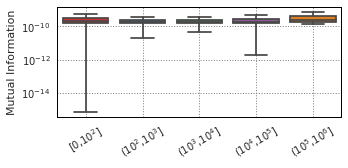

In [24]:
boxplots(df_final,"Mutual Information","plots_violinplots/Cele_death_user_favouritesCount_boxplots.eps")

## Scatter plot with KDE

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sa

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sa

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sa

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sa

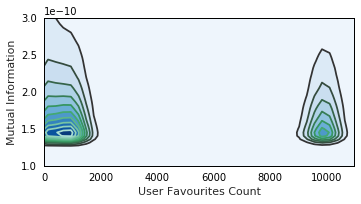

In [27]:
scatter = df
nonOutlierList = Remove_Outlier_Indices(scatter['mi'])
scatter = scatter[nonOutlierList].dropna()
nonOutlierList = Remove_Outlier_Indices(scatter['user_favouritesCount'])
scatter = scatter[nonOutlierList].dropna()

y = scatter['mi'].values
x = scatter['user_favouritesCount'].values

scatter_plot(x, y, "Mutual Information", "plots_violinplots/Cele_death_user_favouritesCount_scatter.eps")

## Violinplot

In [9]:
df = df_user_features.drop(columns=['id1','id2','user1','user2','user3','user4','user5','user6','user_tweetCount',
                     'user_followersCount','user_friendsCount','user_hashtagCount']).sort_values('user_favouritesCount')

df1 = df[df['user_favouritesCount'].between(0, 100, inclusive=True)]
df1 = df1.drop(columns=['user_favouritesCount'])
nonOutlierList = Remove_Outlier_Indices(df1)
df1 = df1[nonOutlierList].dropna()
df1['category']='[0,10$^2$]'


df2 = df[df['user_favouritesCount'].between(101, 1000, inclusive=True)]
df2 = df2.drop(columns=['user_favouritesCount'])
nonOutlierList = Remove_Outlier_Indices(df2)
df2 = df2[nonOutlierList].dropna()
df2['category']='(10$^2$,10$^3$]'

df3 = df[df['user_favouritesCount'].between(1001, 10000, inclusive=True)]
df3 = df3.drop(columns=['user_favouritesCount'])
nonOutlierList = Remove_Outlier_Indices(df3)
df3 = df3[nonOutlierList].dropna()
df3['category']='(10$^3$,10$^4$]'

df4 = df[df['user_favouritesCount'].between(10001, 100000, inclusive=True)]
df4 = df4.drop(columns=['user_favouritesCount'])
nonOutlierList = Remove_Outlier_Indices(df4)
df4 = df4[nonOutlierList].dropna()
df4['category']='(10$^4$,10$^5$]'

df5 = df[df['user_favouritesCount'].between(100001, 1000000, inclusive=True)]
df5 = df5.drop(columns=['user_favouritesCount'])
nonOutlierList = Remove_Outlier_Indices(df5)
df5 = df5[nonOutlierList].dropna()
df5['category']='(10$^5$,10$^6$]'

df_final = df1.append(df2).append(df3).append(df4).append(df5)


/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sa

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sa

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sa

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sa

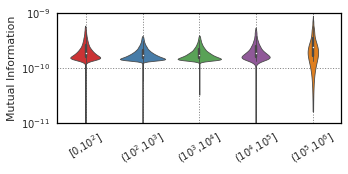

In [10]:
fig, ax = plt.subplots(figsize=(5, 2.5))
ax.set_yscale('log')

ax.spines['bottom'].set_color('0')
ax.spines['top'].set_color('0')
ax.spines['right'].set_color('0')
ax.spines['left'].set_color('0')
sns.violinplot(x='category', y = "mi", data = df_final, palette = "Set1", ax=ax, scale='area',linewidth = 0.8)
sns.set(style = "whitegrid")

plt.rcParams["font.family"] = "courier"
plt.rc('grid', linestyle=":", color='grey')
plt.grid(True)
plt.xlabel("")
plt.xticks(rotation=30)
plt.tight_layout()
plt.ylabel("Mutual Information")

plt.ylim(10e-12, 10e-10)
plt.savefig("plots_violinplots/Cele_death_user_favouritesCount_violinplots.eps", bbox_inches='tight')

# -------------------------------------
# 2. user_followersCount
# -------------------------------------

In [13]:
df = df_user_features.drop(columns=['id1','id2','user1','user2','user3','user4','user5','user6','user_tweetCount',
                     'user_favouritesCount','user_friendsCount','user_hashtagCount']).sort_values('user_followersCount')

df1 = df[df['user_followersCount'].between(0, 100, inclusive=True)]
df1 = df1.drop(columns=['user_followersCount'])
df1['category']='[0,10$^2$]'

df2 = df[df['user_followersCount'].between(101, 1000, inclusive=True)]
df2 = df2.drop(columns=['user_followersCount'])
df2['category']='(10$^2$,10$^3$]'

df3 = df[df['user_followersCount'].between(1001, 10000, inclusive=True)]
df3 = df3.drop(columns=['user_followersCount'])
df3['category']='(10$^3$,10$^4$]'

df4 = df[df['user_followersCount'].between(10001, 100000, inclusive=True)]
df4 = df4.drop(columns=['user_followersCount'])
df4['category']='(10$^4$,10$^5$]'

df5 = df[df['user_followersCount'].between(100001, 1000000, inclusive=True)]
df5 = df5.drop(columns=['user_followersCount'])
df5['category']='(10$^5$,10$^6$]'

df_final = df1.append(df2).append(df3).append(df4).append(df5)

## Boxplots

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sa

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sa

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sa

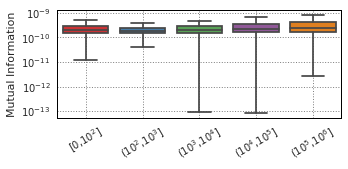

In [15]:
fig, ax = plt.subplots(figsize=(5, 2.5))
ax.set_yscale('log')

ax.spines['bottom'].set_color('0')
ax.spines['top'].set_color('0')
ax.spines['right'].set_color('0')
ax.spines['left'].set_color('0')
sns.boxplot(x='category', y = "mi", data = df_final, palette = "Set1", ax=ax,showfliers=False)
sns.set(style = "whitegrid")

plt.rcParams["font.family"] = "courier"
plt.rc('grid', linestyle=":", color='grey')
plt.grid(True)
plt.xlabel("")
plt.xticks(rotation=30)
plt.tight_layout()
plt.ylabel("Mutual Information")

#plt.ylim(10e-12, 10e-10)
plt.savefig("plots_violinplots/Cele_death_user_followersCount_boxplots.eps", bbox_inches='tight')

## Scatter plot with KDE

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sa

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sa

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sa

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sa

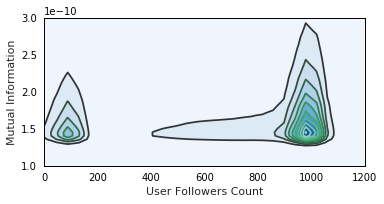

In [19]:
scatter = df
nonOutlierList = Remove_Outlier_Indices(scatter['mi'])
scatter = scatter[nonOutlierList].dropna()
nonOutlierList = Remove_Outlier_Indices(scatter['user_followersCount'])
scatter = scatter[nonOutlierList].dropna()

y = scatter['mi'].values
x = scatter['user_followersCount'].values
fig, ax = plt.subplots(figsize=(5, 3))
#ax = sns.kdeplot(x, y, n_levels = 20, cmap = "Purples_d")


# Basic 2D density plot
sns.set_style("white")
sns.kdeplot(x, y)

# Some features are characteristic of 2D: color palette and wether or not color the lowest range
ax = sns.kdeplot(x, y, cmap="Blues", shade=True, shade_lowest=True)


#ax = sns.kdeplot(x, y, cmap="Reds", shade=True, shade_lowest=False)

plt.rcParams["font.family"] = "courier"
plt.rc('grid', linestyle=":", color='grey')
plt.grid(True)
plt.xlabel("User Followers Count")
#plt.xticks(rotation=30)
plt.tight_layout()
plt.ylabel("Mutual Information")

#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set(ylim=(1e-10,3e-10))
ax.set(xlim=(0,1200))
ax.ticklabel_format( axis='y', style='sci', scilimits=None, useOffset=None, useLocale=None, useMathText=None)
ax.tick_params(color='black', labelcolor='black')
for spine in ax.spines.values():
    spine.set_edgecolor('black')
plt.savefig("plots_violinplots/Cele_death_user_followersCount_scatter.eps", bbox_inches='tight')

## Violinplot

In [20]:
df = df_user_features.drop(columns=['id1','id2','user1','user2','user3','user4','user5','user6','user_tweetCount',
                     'user_favouritesCount','user_friendsCount','user_hashtagCount']).sort_values('user_followersCount')

df1 = df[df['user_followersCount'].between(0, 100, inclusive=True)]
df1 = df1.drop(columns=['user_followersCount'])
nonOutlierList = Remove_Outlier_Indices(df1)
df1 = df1[nonOutlierList].dropna()
df1['category']='[0,10$^2$]'

df2 = df[df['user_followersCount'].between(101, 1000, inclusive=True)]
df2 = df2.drop(columns=['user_followersCount'])
nonOutlierList = Remove_Outlier_Indices(df2)
df2 = df2[nonOutlierList].dropna()
df2['category']='(10$^2$,10$^3$]'

df3 = df[df['user_followersCount'].between(1001, 10000, inclusive=True)]
df3 = df3.drop(columns=['user_followersCount'])
nonOutlierList = Remove_Outlier_Indices(df3)
df3 = df3[nonOutlierList].dropna()
df3['category']='(10$^3$,10$^4$]'

df4 = df[df['user_followersCount'].between(10001, 100000, inclusive=True)]
df4 = df4.drop(columns=['user_followersCount'])
nonOutlierList = Remove_Outlier_Indices(df4)
df4 = df4[nonOutlierList].dropna()
df4['category']='(10$^4$,10$^5$]'

df5 = df[df['user_followersCount'].between(100001, 1000000, inclusive=True)]
df5 = df5.drop(columns=['user_followersCount'])
nonOutlierList = Remove_Outlier_Indices(df5)
df5 = df5[nonOutlierList].dropna()
df5['category']='(10$^5$,10$^6$]'

df_final = df1.append(df2).append(df3).append(df4).append(df5)

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sa

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sa

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sa

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sa

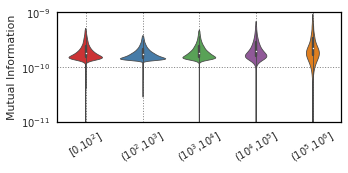

In [21]:
fig, ax = plt.subplots(figsize=(5, 2.5))
ax.set_yscale('log')

ax.spines['bottom'].set_color('0')
ax.spines['top'].set_color('0')
ax.spines['right'].set_color('0')
ax.spines['left'].set_color('0')
sns.violinplot(x='category', y = "mi", data = df_final, palette = "Set1", ax=ax, scale='area',linewidth = 0.8)
sns.set(style = "whitegrid")

plt.rcParams["font.family"] = "courier"
plt.rc('grid', linestyle=":", color='grey')
plt.grid(True)
plt.xlabel("")
plt.xticks(rotation=30)
plt.tight_layout()
plt.ylabel("Mutual Information")

plt.ylim(10e-12, 10e-10)
plt.savefig("plots_violinplots/Cele_death_user_followersCount_violinplots.eps", bbox_inches='tight')

# -------------------------------------
# 3. user_followersCount
# -------------------------------------

In [ ]:
df = df_user_features.drop(columns=['id1','id2','user1','user2','user3','user4','user5','user6','user_tweetCount',
                     'user_favouritesCount','user_followersCount','user_hashtagCount']).sort_values('user_friendsCount')
#df.drop(df.index[:200000], inplace=True)
#df = df.head(50000)
#scatter = df

df1 = df[df['user_friendsCount'].between(0, 100, inclusive=True)]
df1 = df1.drop(columns=['user_friendsCount'])
nonOutlierList = Remove_Outlier_Indices(df1)
df1 = df1[nonOutlierList].dropna()
df1['category']='[0,10$^2$]'
#df1 = df1.rename(columns={"mi": "a"})


df2 = df[df['user_friendsCount'].between(101, 1000, inclusive=True)]
df2 = df2.drop(columns=['user_friendsCount'])
nonOutlierList = Remove_Outlier_Indices(df2)
df2 = df2[nonOutlierList].dropna()
df2['category']='(10$^2$,10$^3$]'
#df2 = df2.rename(columns={"mi": "b"})

df3 = df[df['user_friendsCount'].between(1001, 10000, inclusive=True)]
df3 = df3.drop(columns=['user_friendsCount'])
nonOutlierList = Remove_Outlier_Indices(df3)
df3 = df3[nonOutlierList].dropna()
df3['category']='(10$^3$,10$^4$]'
#df3 = df3.rename(columns={"mi": "c"})

df4 = df[df['user_friendsCount'].between(10001, 100000, inclusive=True)]
df4 = df4.drop(columns=['user_friendsCount'])
nonOutlierList = Remove_Outlier_Indices(df4)
df4 = df4[nonOutlierList].dropna()
df4['category']='(10$^4$,10$^5$]'
#df4 = df4.rename(columns={"mi": "d"})

df5 = df[df['user_friendsCount'].between(100001, 1000000, inclusive=True)]
df5 = df5.drop(columns=['user_friendsCount'])
nonOutlierList = Remove_Outlier_Indices(df5)
df5 = df5[nonOutlierList].dropna()
df5['category']='(10$^5$,10$^6$]'
#df5 = df5.rename(columns={"mi": "e"})

df_final = df1.append(df2).append(df3).append(df4).append(df5)

## Violinplot

In [ ]:
fig, ax = plt.subplots(figsize=(5, 2.5))
ax.set_yscale('log')

ax.spines['bottom'].set_color('0')
ax.spines['top'].set_color('0')
ax.spines['right'].set_color('0')
ax.spines['left'].set_color('0')
sns.violinplot(x='category', y = "mi", data = df_final, palette = "Set1", ax=ax, scale='area',linewidth = 0.8)
sns.set(style = "whitegrid")

plt.rcParams["font.family"] = "courier"
plt.rc('grid', linestyle=":", color='grey')
plt.grid(True)
plt.xlabel("")
plt.xticks(rotation=30)
plt.tight_layout()
plt.ylabel("Mutual Information")

plt.ylim(10e-12, 10e-10)
plt.savefig("plots_violinplots/Cele_death_user_friendsCount_violinplots.eps", bbox_inches='tight')

## Scatter plot with KDE

In [ ]:
scatter = df
nonOutlierList = Remove_Outlier_Indices(scatter['mi'])
scatter = scatter[nonOutlierList].dropna()
nonOutlierList = Remove_Outlier_Indices(scatter['user_friendsCount'])
scatter = scatter[nonOutlierList].dropna()

y = scatter['mi'].values
x = scatter['user_friendsCount'].values
fig, ax = plt.subplots(figsize=(5, 3))
#ax = sns.kdeplot(x, y, n_levels = 20, cmap = "Purples_d")

# Basic 2D density plot
sns.set_style("white")
sns.kdeplot(x, y)

# Some features are characteristic of 2D: color palette and wether or not color the lowest range
ax = sns.kdeplot(x, y, cmap="Blues", shade=True, shade_lowest=True)


#ax = sns.kdeplot(x, y, cmap="Reds", shade=True, shade_lowest=False)

plt.rcParams["font.family"] = "courier"
plt.rc('grid', linestyle=":", color='grey')
plt.grid(True)
plt.xlabel("User Friends Count")
#plt.xticks(rotation=30)
plt.tight_layout()
plt.ylabel("Mutual Information")

#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set(ylim=(1e-10,3e-10))
ax.set(xlim=(0,1200))
ax.ticklabel_format( axis='y', style='sci', scilimits=None, useOffset=None, useLocale=None, useMathText=None)
ax.tick_params(color='black', labelcolor='black')
for spine in ax.spines.values():
    spine.set_edgecolor('black')
plt.savefig("plots_violinplots/Cele_death_user_friendsCount_scatter.eps", bbox_inches='tight')

# user_hashtagCount

In [ ]:
df = df_user_features.drop(columns=['id1','id2','user1','user2','user3','user4','user5','user6','user_tweetCount',
                     'user_favouritesCount','user_followersCount','user_friendsCount']).sort_values('user_hashtagCount')
#df.drop(df.index[:200000], inplace=True)
#df = df.head(50000)
#scatter = df

df1 = df[df['user_hashtagCount'].between(0, 100, inclusive=True)]
df1 = df1.drop(columns=['user_hashtagCount'])
nonOutlierList = Remove_Outlier_Indices(df1)
df1 = df1[nonOutlierList].dropna()
df1['category']='[0,10$^2$]'
#df1 = df1.rename(columns={"mi": "a"})

df2 = df[df['user_hashtagCount'].between(101, 1000, inclusive=True)]
df2 = df2.drop(columns=['user_hashtagCount'])
nonOutlierList = Remove_Outlier_Indices(df2)
df2 = df2[nonOutlierList].dropna()
df2['category']='(10$^2$,10$^3$]'
#df2 = df2.rename(columns={"mi": "b"})

df3 = df[df['user_hashtagCount'].between(1001, 10000, inclusive=True)]
df3 = df3.drop(columns=['user_hashtagCount'])
nonOutlierList = Remove_Outlier_Indices(df3)
df3 = df3[nonOutlierList].dropna()
df3['category']='(10$^3$,10$^4$]'
#df3 = df3.rename(columns={"mi": "c"})

df_final = df1.append(df2).append(df3)


## Violinplot

In [ ]:
fig, ax = plt.subplots(figsize=(5, 2.5))
ax.set_yscale('log')

ax.spines['bottom'].set_color('0')
ax.spines['top'].set_color('0')
ax.spines['right'].set_color('0')
ax.spines['left'].set_color('0')
sns.violinplot(x='category', y = "mi", data = df_final, palette = "Set1", ax=ax, scale='area',linewidth = 0.8)
sns.set(style = "whitegrid")

plt.rcParams["font.family"] = "courier"
plt.rc('grid', linestyle=":", color='grey')
plt.grid(True)
plt.xlabel("")
plt.xticks(rotation=30)
plt.tight_layout()
plt.ylabel("Mutual Information")

plt.ylim(10e-12, 10e-9)
plt.savefig("plots_violinplots/Cele_death_user_hashtagCount_violinplots.eps", bbox_inches='tight')

## Scatter plot with KDE

In [ ]:
scatter = df
nonOutlierList = Remove_Outlier_Indices(scatter['mi'])
scatter = scatter[nonOutlierList].dropna()
nonOutlierList = Remove_Outlier_Indices(scatter['user_hashtagCount'])
scatter = scatter[nonOutlierList].dropna()

y = scatter['mi'].values
x = scatter['user_hashtagCount'].values
fig, ax = plt.subplots(figsize=(5, 3))
#ax = sns.kdeplot(x, y, n_levels = 20, cmap = "Purples_d")

# Basic 2D density plot
sns.set_style("white")
sns.kdeplot(x, y)


# Some features are characteristic of 2D: color palette and wether or not color the lowest range
ax = sns.kdeplot(x, y, cmap="Blues", shade=True, shade_lowest=True)


#ax = sns.kdeplot(x, y, cmap="Reds", shade=True, shade_lowest=False)

plt.rcParams["font.family"] = "courier"
plt.rc('grid', linestyle=":", color='grey')
plt.grid(True)
plt.xlabel("User Hashtags Count")
#plt.xticks(rotation=30)
plt.tight_layout()
plt.ylabel("Mutual Information")

#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set(ylim=(1e-10,3e-10))
ax.set(xlim=(0,50))
ax.ticklabel_format( axis='y', style='sci', scilimits=None, useOffset=None, useLocale=None, useMathText=None)
ax.tick_params(color='black', labelcolor='black')
for spine in ax.spines.values():
    spine.set_edgecolor('black')
plt.savefig("plots_violinplots/Cele_death_user_hashtagCount_scatter.eps", bbox_inches='tight')

# user_tweetCount

In [ ]:
df = df_user_features.drop(columns=['id1','id2','user1','user2','user3','user4','user5','user6','user_friendsCount',
                     'user_favouritesCount','user_followersCount','user_hashtagCount']).sort_values('user_tweetCount')
#df.drop(df.index[:200000], inplace=True)
#df = df.head(50000)
#scatter = df

df2 = df[df['user_tweetCount'].between(101, 1000, inclusive=True)]
df2 = df2.drop(columns=['user_tweetCount'])
nonOutlierList = Remove_Outlier_Indices(df2)
df2 = df2[nonOutlierList].dropna()
df2['category']='(10$^2$,10$^3$]'
#df2 = df2.rename(columns={"mi": "b"})

df3 = df[df['user_tweetCount'].between(1001, 10000, inclusive=True)]
df3 = df3.drop(columns=['user_tweetCount'])
nonOutlierList = Remove_Outlier_Indices(df3)
df3 = df3[nonOutlierList].dropna()
df3['category']='(10$^3$,10$^4$]'
#df3 = df3.rename(columns={"mi": "c"})

df4 = df[df['user_tweetCount'].between(10001, 100000, inclusive=True)]
df4 = df4.drop(columns=['user_tweetCount'])
nonOutlierList = Remove_Outlier_Indices(df4)
df4 = df4[nonOutlierList].dropna()
df4['category']='(10$^4$,10$^5$]'
#df4 = df4.rename(columns={"mi": "d"})


df_final = df2.append(df3).append(df4)

## Violinplot

In [ ]:
fig, ax = plt.subplots(figsize=(5, 2.5))
ax.set_yscale('log')

ax.spines['bottom'].set_color('0')
ax.spines['top'].set_color('0')
ax.spines['right'].set_color('0')
ax.spines['left'].set_color('0')
sns.violinplot(x='category', y = "mi", data = df_final, palette = "Set1", ax=ax, scale='area',linewidth = 0.8)
sns.set(style = "whitegrid")

plt.rcParams["font.family"] = "courier"
plt.rc('grid', linestyle=":", color='grey')
plt.grid(True)
plt.xlabel("")
plt.xticks(rotation=30)
plt.tight_layout()
plt.ylabel("Mutual Information")

plt.ylim(10e-12, 10e-9)
plt.savefig("plots_violinplots/Cele_death_user_tweetCount_violinplots.eps", bbox_inches='tight')

## Scatter plot with KDE

In [ ]:
scatter = df
nonOutlierList = Remove_Outlier_Indices(scatter['mi'])
scatter = scatter[nonOutlierList].dropna()
nonOutlierList = Remove_Outlier_Indices(scatter['user_tweetCount'])
scatter = scatter[nonOutlierList].dropna()

y = scatter['mi'].values
x = scatter['user_tweetCount'].values
fig, ax = plt.subplots(figsize=(5, 3))
#ax = sns.kdeplot(x, y, n_levels = 20, cmap = "Purples_d")

# Basic 2D density plot
sns.set_style("white")
sns.kdeplot(x, y)


# Some features are characteristic of 2D: color palette and wether or not color the lowest range
ax = sns.kdeplot(x, y, cmap="Blues", shade=True, shade_lowest=True)


#ax = sns.kdeplot(x, y, cmap="Reds", shade=True, shade_lowest=False)

plt.rcParams["font.family"] = "courier"
plt.rc('grid', linestyle=":", color='grey')
plt.grid(True)
plt.xlabel("User Tweets Count")
#plt.xticks(rotation=30)
plt.tight_layout()
plt.ylabel("Mutual Information")

#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set(ylim=(1.2e-10,3e-10))
ax.set(xlim=(200,500))
ax.ticklabel_format( axis='y', style='sci', scilimits=None, useOffset=None, useLocale=None, useMathText=None)
ax.tick_params(color='black', labelcolor='black')
for spine in ax.spines.values():
    spine.set_edgecolor('black')
plt.savefig("plots_violinplots/Cele_death_user_tweetCount_scatter.eps", bbox_inches='tight')

# user_tweetCount

In [ ]:
df = df_hashtag_features.drop(columns=['id1','id2','hashtag1','hashtag2','hashtag3',
                     'hashtag_userCount']).sort_values('hashtag_tweetCount')
#df.drop(df.index[:200000], inplace=True)
#df = df.head(50000)
#scatter = df

df1 = df[df['hashtag_tweetCount'].between(0, 100, inclusive=True)]
df1 = df1.drop(columns=['hashtag_tweetCount'])
nonOutlierList = Remove_Outlier_Indices(df1)
df1 = df1[nonOutlierList].dropna()
df1['category']='[0,10$^2$]'
#df1 = df1.rename(columns={"mi": "a"})

df2 = df[df['hashtag_tweetCount'].between(101, 1000, inclusive=True)]
df2 = df2.drop(columns=['hashtag_tweetCount'])
nonOutlierList = Remove_Outlier_Indices(df2)
df2 = df2[nonOutlierList].dropna()
df2['category']='(10$^2$,10$^3$]'
#df2 = df2.rename(columns={"mi": "b"})

df3 = df[df['hashtag_tweetCount'].between(1001, 10000, inclusive=True)]
df3 = df3.drop(columns=['hashtag_tweetCount'])
nonOutlierList = Remove_Outlier_Indices(df3)
df3 = df3[nonOutlierList].dropna()
df3['category']='(10$^3$,10$^4$]'
#df3 = df3.rename(columns={"mi": "c"})

df4 = df[df['hashtag_tweetCount'].between(10001, 100000, inclusive=True)]
df4 = df4.drop(columns=['hashtag_tweetCount'])
nonOutlierList = Remove_Outlier_Indices(df4)
df4 = df4[nonOutlierList].dropna()
df4['category']='(10$^4$,10$^5$]'
#df4 = df4.rename(columns={"mi": "d"})

df5 = df[df['hashtag_tweetCount'].between(100001, 1000000, inclusive=True)]
df5 = df5.drop(columns=['hashtag_tweetCount'])
nonOutlierList = Remove_Outlier_Indices(df5)
df5 = df5[nonOutlierList].dropna()
df5['category']='(10$^5$,10$^6$]'
#df5 = df5.rename(columns={"mi": "e"})

df_final = df1.append(df2).append(df3).append(df4).append(df5)


## Violinplot

In [ ]:
fig, ax = plt.subplots(figsize=(5, 2.5))
ax.set_yscale('log')

ax.spines['bottom'].set_color('0')
ax.spines['top'].set_color('0')
ax.spines['right'].set_color('0')
ax.spines['left'].set_color('0')
sns.violinplot(x='category', y = "mi", data = df_final, palette = "Set1", ax=ax, scale='area',linewidth = 0.8)
sns.set(style = "whitegrid")

plt.rcParams["font.family"] = "courier"
plt.rc('grid', linestyle=":", color='grey')
plt.grid(True)
plt.xlabel("")
plt.xticks(rotation=30)
plt.tight_layout()
plt.ylabel("Mutual Information")

plt.ylim(10e-12, 10e-8)
plt.savefig("plots_violinplots/Cele_death_hashtag_tweetCount_violinplots.eps", bbox_inches='tight')

## Scatter plot with KDE

In [ ]:
scatter = df
nonOutlierList = Remove_Outlier_Indices(scatter['mi'])
scatter = scatter[nonOutlierList].dropna()
nonOutlierList = Remove_Outlier_Indices(scatter['hashtag_tweetCount'])
scatter = scatter[nonOutlierList].dropna()

y = scatter['mi'].values
x = scatter['hashtag_tweetCount'].values
fig, ax = plt.subplots(figsize=(5, 3))
#ax = sns.kdeplot(x, y, n_levels = 20, cmap = "Purples_d")

# Basic 2D density plot
sns.set_style("white")
sns.kdeplot(x, y)


# Some features are characteristic of 2D: color palette and wether or not color the lowest range
ax = sns.kdeplot(x, y, cmap="Blues", shade=True, shade_lowest=True)


#ax = sns.kdeplot(x, y, cmap="Reds", shade=True, shade_lowest=False)

plt.rcParams["font.family"] = "courier"
plt.rc('grid', linestyle=":", color='grey')
plt.grid(True)
plt.xlabel("Hashtag tweets Count")
#plt.xticks(rotation=30)
plt.tight_layout()
plt.ylabel("Mutual Information")

#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set(ylim=(0.2e-10,2e-10))
ax.set(xlim=(25,330))
ax.ticklabel_format( axis='y', style='sci', scilimits=None, useOffset=None, useLocale=None, useMathText=None)
ax.tick_params(color='black', labelcolor='black')
for spine in ax.spines.values():
    spine.set_edgecolor('black')
plt.savefig("plots_violinplots/Cele_death_hashtag_tweetCount_scatter.eps", bbox_inches='tight')

# hashtag_userCount

In [ ]:
df = df_hashtag_features.drop(columns=['id1','id2','hashtag1','hashtag2','hashtag3',
                     'hashtag_tweetCount']).sort_values('hashtag_userCount')
#df.drop(df.index[:200000], inplace=True)
#df = df.head(50000)
#scatter = df

df1 = df[df['hashtag_userCount'].between(0, 100, inclusive=True)]
df1 = df1.drop(columns=['hashtag_userCount'])
nonOutlierList = Remove_Outlier_Indices(df1)
df1 = df1[nonOutlierList].dropna()
df1['category']='[0,10$^2$]'
#df1 = df1.rename(columns={"mi": "a"})

df2 = df[df['hashtag_userCount'].between(101, 1000, inclusive=True)]
df2 = df2.drop(columns=['hashtag_userCount'])
nonOutlierList = Remove_Outlier_Indices(df2)
df2 = df2[nonOutlierList].dropna()
df2['category']='(10$^2$,10$^3$]'
#df2 = df2.rename(columns={"mi": "b"})

df3 = df[df['hashtag_userCount'].between(1001, 10000, inclusive=True)]
df3 = df3.drop(columns=['hashtag_userCount'])
nonOutlierList = Remove_Outlier_Indices(df3)
df3 = df3[nonOutlierList].dropna()
df3['category']='(10$^3$,10$^4$]'
#df3 = df3.rename(columns={"mi": "c"})

df4 = df[df['hashtag_userCount'].between(10001, 100000, inclusive=True)]
df4 = df4.drop(columns=['hashtag_userCount'])
nonOutlierList = Remove_Outlier_Indices(df4)
df4 = df4[nonOutlierList].dropna()
df4['category']='(10$^4$,10$^5$]'
#df4 = df4.rename(columns={"mi": "d"})

df5 = df[df['hashtag_userCount'].between(100001, 1000000, inclusive=True)]
df5 = df5.drop(columns=['hashtag_userCount'])
nonOutlierList = Remove_Outlier_Indices(df5)
df5 = df5[nonOutlierList].dropna()
df5['category']='(10$^5$,10$^6$]'
#df5 = df5.rename(columns={"mi": "e"})

df_final = df1.append(df2).append(df3).append(df4).append(df5)


## Violinplot

In [ ]:
fig, ax = plt.subplots(figsize=(5, 2.5))
ax.set_yscale('log')

ax.spines['bottom'].set_color('0')
ax.spines['top'].set_color('0')
ax.spines['right'].set_color('0')
ax.spines['left'].set_color('0')
sns.violinplot(x='category', y = "mi", data = df_final, palette = "Set1", ax=ax, scale='area',linewidth = 0.8)
sns.set(style = "whitegrid")

plt.rcParams["font.family"] = "courier"
plt.rc('grid', linestyle=":", color='grey')
plt.grid(True)
plt.xlabel("")
plt.xticks(rotation=30)
plt.tight_layout()
plt.ylabel("Mutual Information")

plt.ylim(10e-12, 10e-7)
plt.savefig("plots_violinplots/Cele_death_hashtag_userCount_violinplots.eps", bbox_inches='tight')

## Scatter plot with KDE

In [ ]:
scatter = df
nonOutlierList = Remove_Outlier_Indices(scatter['mi'])
scatter = scatter[nonOutlierList].dropna()
nonOutlierList = Remove_Outlier_Indices(scatter['hashtag_userCount'])
scatter = scatter[nonOutlierList].dropna()

y = scatter['mi'].values
x = scatter['hashtag_userCount'].values
fig, ax = plt.subplots(figsize=(5, 3))
#ax = sns.kdeplot(x, y, n_levels = 20, cmap = "Purples_d")

# Basic 2D density plot
sns.set_style("white")
sns.kdeplot(x, y)


# Some features are characteristic of 2D: color palette and wether or not color the lowest range
ax = sns.kdeplot(x, y, cmap="Blues", shade=True, shade_lowest=True)


#ax = sns.kdeplot(x, y, cmap="Reds", shade=True, shade_lowest=False)

plt.rcParams["font.family"] = "courier"
plt.rc('grid', linestyle=":", color='grey')
plt.grid(True)
plt.xlabel("Hashtag Users Count")
#plt.xticks(rotation=30)
plt.tight_layout()
plt.ylabel("Mutual Information")

#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set(ylim=(0e-10,2e-10))
ax.set(xlim=(30,230))
ax.ticklabel_format( axis='y', style='sci', scilimits=None, useOffset=None, useLocale=None, useMathText=None)
ax.tick_params(color='black', labelcolor='black')
for spine in ax.spines.values():
    spine.set_edgecolor('black')
plt.savefig("plots_violinplots/Cele_death_hashtag_userCount_scatter.eps", bbox_inches='tight')

# location_userCount

In [ ]:
df = df_loc_features.drop(columns=['id1','id2','location1','location2']).sort_values('location_userCount')
#df.drop(df.index[:200000], inplace=True)
#df = df.head(50000)
#scatter = df

df1 = df[df['location_userCount'].between(0, 100, inclusive=True)]
df1 = df1.drop(columns=['location_userCount'])
nonOutlierList = Remove_Outlier_Indices(df1)
df1 = df1[nonOutlierList].dropna()
df1['category']='[0,10$^2$]'
#df1 = df1.rename(columns={"mi": "a"})

df2 = df[df['location_userCount'].between(101, 1000, inclusive=True)]
df2 = df2.drop(columns=['location_userCount'])
nonOutlierList = Remove_Outlier_Indices(df2)
df2 = df2[nonOutlierList].dropna()
df2['category']='(10$^2$,10$^3$]'
#df2 = df2.rename(columns={"mi": "b"})

df3 = df[df['location_userCount'].between(1001, 10000, inclusive=True)]
df3 = df3.drop(columns=['location_userCount'])
nonOutlierList = Remove_Outlier_Indices(df3)
df3 = df3[nonOutlierList].dropna()
df3['category']='(10$^3$,10$^4$]'
#df3 = df3.rename(columns={"mi": "c"})

df4 = df[df['location_userCount'].between(10001, 100000, inclusive=True)]
df4 = df4.drop(columns=['location_userCount'])
nonOutlierList = Remove_Outlier_Indices(df4)
df4 = df4[nonOutlierList].dropna()
df4['category']='(10$^4$,10$^5$]'
#df4 = df4.rename(columns={"mi": "d"})

df5 = df[df['location_userCount'].between(100001, 1000000, inclusive=True)]
df5 = df5.drop(columns=['location_userCount'])
nonOutlierList = Remove_Outlier_Indices(df5)
df5 = df5[nonOutlierList].dropna()
df5['category']='(10$^5$,10$^6$]'
#df5 = df5.rename(columns={"mi": "e"})

df_final = df1.append(df2).append(df3).append(df4).append(df5)


## violinplot

In [ ]:
fig, ax = plt.subplots(figsize=(5, 2.5))
ax.set_yscale('log')

ax.spines['bottom'].set_color('0')
ax.spines['top'].set_color('0')
ax.spines['right'].set_color('0')
ax.spines['left'].set_color('0')
sns.violinplot(x='category', y = "mi", data = df_final, palette = "Set1", ax=ax, scale='area',linewidth = 0.8)
sns.set(style = "whitegrid")

plt.rcParams["font.family"] = "courier"
plt.rc('grid', linestyle=":", color='grey')
plt.grid(True)
plt.xlabel("")
plt.xticks(rotation=30)
plt.tight_layout()
plt.ylabel("Mutual Information")

plt.ylim(10e-12, 10e-7)
plt.savefig("plots_violinplots/Cele_death_location_userCount_violinplots.eps", bbox_inches='tight')

## Scatter plot with KDE

In [ ]:
scatter = df
nonOutlierList = Remove_Outlier_Indices(scatter['mi'])
scatter = scatter[nonOutlierList].dropna()
nonOutlierList = Remove_Outlier_Indices(scatter['location_userCount'])
scatter = scatter[nonOutlierList].dropna()

y = scatter['mi'].values
x = scatter['location_userCount'].values
fig, ax = plt.subplots(figsize=(5, 3))
#ax = sns.kdeplot(x, y, n_levels = 20, cmap = "Purples_d")

# Basic 2D density plot
sns.set_style("white")
sns.kdeplot(x, y)


# Some features are characteristic of 2D: color palette and wether or not color the lowest range
ax = sns.kdeplot(x, y, cmap="Blues", shade=True, shade_lowest=True)


#ax = sns.kdeplot(x, y, cmap="Reds", shade=True, shade_lowest=False)

plt.rcParams["font.family"] = "courier"
plt.rc('grid', linestyle=":", color='grey')
plt.grid(True)
plt.xlabel("Location Users Count")
#plt.xticks(rotation=30)
plt.tight_layout()
plt.ylabel("Mutual Information")

#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set(ylim=(0e-10,3e-10))
ax.set(xlim=(0,50))
ax.ticklabel_format( axis='y', style='sci', scilimits=None, useOffset=None, useLocale=None, useMathText=None)
ax.tick_params(color='black', labelcolor='black')
for spine in ax.spines.values():
    spine.set_edgecolor('black')
plt.savefig("plots_violinplots/Cele_death_location_userCount_scatter.eps", bbox_inches='tight')

# mention_tweetCount

In [ ]:
df = df_mention_features.drop(columns=['id1','id2','mention1','mention2']).sort_values('mention_tweetCount')
#df.drop(df.index[:200000], inplace=True)
#df = df.head(50000)
#scatter = df


df2 = df[df['mention_tweetCount'].between(101, 1000, inclusive=True)]
df2 = df2.drop(columns=['mention_tweetCount'])
nonOutlierList = Remove_Outlier_Indices(df2)
df2 = df2[nonOutlierList].dropna()
df2['category']='(10$^2$,10$^3$]'
#df2 = df2.rename(columns={"mi": "b"})

df3 = df[df['mention_tweetCount'].between(1001, 10000, inclusive=True)]
df3 = df3.drop(columns=['mention_tweetCount'])
nonOutlierList = Remove_Outlier_Indices(df3)
df3 = df3[nonOutlierList].dropna()
df3['category']='(10$^3$,10$^4$]'
#df3 = df3.rename(columns={"mi": "c"})

df4 = df[df['mention_tweetCount'].between(10001, 100000, inclusive=True)]
df4 = df4.drop(columns=['mention_tweetCount'])
nonOutlierList = Remove_Outlier_Indices(df4)
df4 = df4[nonOutlierList].dropna()
df4['category']='(10$^4$,10$^5$]'
#df4 = df4.rename(columns={"mi": "d"})

df5 = df[df['mention_tweetCount'].between(100001, 1000000, inclusive=True)]
df5 = df5.drop(columns=['mention_tweetCount'])
nonOutlierList = Remove_Outlier_Indices(df5)
df5 = df5[nonOutlierList].dropna()
df5['category']='(10$^5$,10$^6$]'
#df5 = df5.rename(columns={"mi": "e"})

df_final = df1.append(df2).append(df3).append(df4).append(df5)


## violinplot

In [ ]:
fig, ax = plt.subplots(figsize=(5, 2.5))
ax.set_yscale('log')

ax.spines['bottom'].set_color('0')
ax.spines['top'].set_color('0')
ax.spines['right'].set_color('0')
ax.spines['left'].set_color('0')
sns.violinplot(x='category', y = "mi", data = df_final, palette = "Set1", ax=ax, scale='area',linewidth = 0.8)
sns.set(style = "whitegrid")

plt.rcParams["font.family"] = "courier"
plt.rc('grid', linestyle=":", color='grey')
plt.grid(True)
plt.xlabel("")
plt.xticks(rotation=30)
plt.tight_layout()
plt.ylabel("Mutual Information")

plt.ylim(10e-12, 10e-7)
plt.savefig("plots_violinplots/Cele_death_mention_tweetCount_violinplots.eps", bbox_inches='tight')

## Scatter plot with KDE

In [ ]:
scatter = df
nonOutlierList = Remove_Outlier_Indices(scatter['mi'])
scatter = scatter[nonOutlierList].dropna()
nonOutlierList = Remove_Outlier_Indices(scatter['mention_tweetCount'])
scatter = scatter[nonOutlierList].dropna()

y = scatter['mi'].values
x = scatter['mention_tweetCount'].values
fig, ax = plt.subplots(figsize=(5, 3))
#ax = sns.kdeplot(x, y, n_levels = 20, cmap = "Purples_d")

# Basic 2D density plot
sns.set_style("white")
sns.kdeplot(x, y)


# Some features are characteristic of 2D: color palette and wether or not color the lowest range
ax = sns.kdeplot(x, y, cmap="Blues", shade=True, shade_lowest=True)


#ax = sns.kdeplot(x, y, cmap="Reds", shade=True, shade_lowest=False)

plt.rcParams["font.family"] = "courier"
plt.rc('grid', linestyle=":", color='grey')
plt.grid(True)
plt.xlabel("Mention Tweets Count")
#plt.xticks(rotation=30)
plt.tight_layout()
plt.ylabel("Mutual Information")

#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set(ylim=(1e-10,5e-10))
ax.set(xlim=(150,800))
ax.ticklabel_format( axis='y', style='sci', scilimits=None, useOffset=None, useLocale=None, useMathText=None)
ax.tick_params(color='black', labelcolor='black')
for spine in ax.spines.values():
    spine.set_edgecolor('black')
plt.savefig("plots_violinplots/Cele_death_mention_tweetCount_scatter.eps", bbox_inches='tight')

# term_tweetCount

In [ ]:
df = df_term_features.drop(columns=['id1','id2','term1','term2']).sort_values('term_tweetCount')
#df.drop(df.index[:200000], inplace=True)
#df = df.head(50000)
#scatter = df


df2 = df[df['term_tweetCount'].between(101, 1000, inclusive=True)]
df2 = df2.drop(columns=['term_tweetCount'])
nonOutlierList = Remove_Outlier_Indices(df2)
df2 = df2[nonOutlierList].dropna()
df2['category']='(10$^2$,10$^3$]'
#df2 = df2.rename(columns={"mi": "b"})

df3 = df[df['term_tweetCount'].between(1001, 10000, inclusive=True)]
df3 = df3.drop(columns=['term_tweetCount'])
nonOutlierList = Remove_Outlier_Indices(df3)
df3 = df3[nonOutlierList].dropna()
df3['category']='(10$^3$,10$^4$]'
#df3 = df3.rename(columns={"mi": "c"})

df4 = df[df['term_tweetCount'].between(10001, 100000, inclusive=True)]
df4 = df4.drop(columns=['term_tweetCount'])
nonOutlierList = Remove_Outlier_Indices(df4)
df4 = df4[nonOutlierList].dropna()
df4['category']='(10$^4$,10$^5$]'
#df4 = df4.rename(columns={"mi": "d"})

df5 = df[df['term_tweetCount'].between(100001, 1000000, inclusive=True)]
df5 = df5.drop(columns=['term_tweetCount'])
nonOutlierList = Remove_Outlier_Indices(df5)
df5 = df5[nonOutlierList].dropna()
df5['category']='(10$^5$,10$^6$]'
#df5 = df5.rename(columns={"mi": "e"})

df_final = df1.append(df2).append(df3).append(df4).append(df5)


# violinplot

In [ ]:
fig, ax = plt.subplots(figsize=(5, 2.5))
ax.set_yscale('log')

ax.spines['bottom'].set_color('0')
ax.spines['top'].set_color('0')
ax.spines['right'].set_color('0')
ax.spines['left'].set_color('0')
sns.violinplot(x='category', y = "mi", data = df_final, palette = "Set1", ax=ax, scale='area',linewidth = 0.8)
sns.set(style = "whitegrid")

plt.rcParams["font.family"] = "courier"
plt.rc('grid', linestyle=":", color='grey')
plt.grid(True)
plt.xlabel("")
plt.xticks(rotation=30)
plt.tight_layout()
plt.ylabel("Mutual Information")

plt.ylim(10e-12, 10e-7)
plt.savefig("plots_violinplots/Cele_death_term_tweetCount_violinplots.eps", bbox_inches='tight')

## Scatter plot with KDE

In [ ]:
scatter = df
nonOutlierList = Remove_Outlier_Indices(scatter['mi'])
scatter = scatter[nonOutlierList].dropna()
nonOutlierList = Remove_Outlier_Indices(scatter['term_tweetCount'])
scatter = scatter[nonOutlierList].dropna()

y = scatter['mi'].values
x = scatter['term_tweetCount'].values
fig, ax = plt.subplots(figsize=(5, 3))
#ax = sns.kdeplot(x, y, n_levels = 20, cmap = "Purples_d")

# Basic 2D density plot
sns.set_style("white")
sns.kdeplot(x, y)


# Some features are characteristic of 2D: color palette and wether or not color the lowest range
ax = sns.kdeplot(x, y, cmap="Blues", shade=True, shade_lowest=True)


#ax = sns.kdeplot(x, y, cmap="Reds", shade=True, shade_lowest=False)

plt.rcParams["font.family"] = "courier"
plt.rc('grid', linestyle=":", color='grey')
plt.grid(True)
plt.xlabel("Mention Tweets Count")
#plt.xticks(rotation=30)
plt.tight_layout()
plt.ylabel("Mutual Information")

#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set(ylim=(0e-10,10e-10))
ax.set(xlim=(0,1300))
ax.ticklabel_format( axis='y', style='sci', scilimits=None, useOffset=None, useLocale=None, useMathText=None)
ax.tick_params(color='black', labelcolor='black')
for spine in ax.spines.values():
    spine.set_edgecolor('black')
plt.savefig("plots_violinplots/Cele_death_term_tweetCount_scatter.eps", bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(figsize=(5, 2.5))
ax.set_yscale('log')

ax.spines['bottom'].set_color('0')
ax.spines['top'].set_color('0')
ax.spines['right'].set_color('0')
ax.spines['left'].set_color('0')
sns.boxplot(x='category', y = "mi", data=df_final)
sns.set(style = "whitegrid")

plt.rcParams["font.family"] = "courier"
plt.rc('grid', linestyle=":", color='grey')
plt.grid(True)
plt.xlabel("")
plt.xticks(rotation=30)
plt.tight_layout()
plt.ylabel("Mutual Information")

plt.ylim(10e-12, 10e-7)